<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/3_4_Unsupervised_Learning_in_Python_Discovering_Interpretable_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-4 Unsupervised Learning in Python - Discovering Interpretable Features

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import StandardScaler, normalize

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='

### Wikipedia Articles

In [3]:
id = '1VWkESs1IzFlbhOJWIODEgMC3oIqQ5W6n'
articles = pd.read_csv(data_base_url + id, index_col=0)
articles.shape

(13125, 60)

In [4]:
id = '1RcSVKyjnO-6_qugq8PRy_-dFkxHtlO2O'
words = pd.read_csv(data_base_url + id, header=None)
words = list(words[0].values)
len(words), words

(13125,
 ['aaron',
  'abandon',
  'abandoned',
  'abandoning',
  'abandonment',
  'abbas',
  'abbey',
  'abbreviated',
  'abbreviation',
  'abc',
  'abdomen',
  'abdominal',
  'abdul',
  'abel',
  'abilities',
  'ability',
  'able',
  'abnormal',
  'abnormalities',
  'abnormally',
  'aboard',
  'abolish',
  'abolished',
  'abolishing',
  'abolition',
  'aboriginal',
  'abortion',
  'abraham',
  'abroad',
  'abrupt',
  'abruptly',
  'absence',
  'absent',
  'absolute',
  'absolutely',
  'absorb',
  'absorbed',
  'absorbing',
  'absorbs',
  'absorption',
  'abstract',
  'abstraction',
  'absurd',
  'abu',
  'abundance',
  'abundant',
  'abuse',
  'abused',
  'abuses',
  'abusive',
  'academia',
  'academic',
  'academics',
  'academies',
  'academy',
  'accelerate',
  'accelerated',
  'accelerating',
  'acceleration',
  'accent',
  'accents',
  'accept',
  'acceptable',
  'acceptance',
  'accepted',
  'accepting',
  'accepts',
  'access',
  'accessed',
  'accessible',
  'accessing',
  'a

### LED Images

In [5]:
id = '1NMBYzPsBq_4xBPOYd4sfXOnsEB2kHSHD'
led = pd.read_csv(data_base_url + id, header=None)
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 104 entries, 0 to 103
dtypes: float64(104)
memory usage: 81.4 KB


In [6]:
led.shape

(100, 104)

In [7]:
# 100 images, each are 13 x 8 pixels
led

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Non-negative matrix factorization (NMF)

- NMF is a dimension reduction technique
- NMF models are interpretable, unlike PCA
- Easy to interpret means easy to explain
- All sample features must be non-negative $\left(\ge 0\right)$

### Interpretable parts

- NMF expresses documents as combinations of topics (or "themes")

 <img src='https://drive.google.com/uc?export=view&id=1-XjaKuRbRpOrQZLTL8oImNt8VThfKHwZ'/>

 - NMF expresses images as combinations of patterns

 <img src='https://drive.google.com/uc?export=view&id=1_39Y-B_i5j8g_PCp4UHKAWXTUI8oeQMR'/>

### Using `sklearn` NMF

- Follows `fit()` / `transform()` pattern
- Unlike with PCA, the `n_components` must be specified
- Works with NumPy arrays and with `csr_matrix`

### Example: word-frequency array

- Word frequency array, 4 words, many documents
- Measure presence of words in each document using "tf-idf"
    - **tf**: frequency of word in document
        - If 10% of the words in the document are "datacamp", then the **tf** for "datacamp" in that document is 0.1
    - **idf**: is a weighting scheme that reduces the influence of frequent words like "the"

<img src='https://drive.google.com/uc?export=view&id=1lRK8kJw9uWLmSNMph2xLO0R3Etjry4l5'/>

- In the following example, `samples` is the word-frequency array

```python
from sklearn.decomposition import NMF

model = NMF(n_components=2)
model.fit(samples)

nmf_features = model.transform(samples)
```

### NMF components

- NMF has components, just like PCA has principle components

```python
print(model.components_)
```


```bash
[[0.01  0.    2.13  0.54]
 [0.99  1.47  0.    0.5]]
```

- In our example, there are two components and they live in a 4 dimensional space, corresponding to the 4 words in the vocabulary.
    - Dimension of components = dimension of samples (same as with PCA)
- The entries of the NFM components are always non-negative.

### NMF features

- NMF feature values are non-negative
- In our example there are two columns corresponding to now two nmf features

```python
print(nmf_feature)
```

```bash
[[0.    0.2 ]
 [0.19  0.  ],
 ...
 [0.15  0.12]]
```


### Reconstruction of a sample

The features and components of an MMF model can be combined to approximately reconstruct the original data samples

<img src='https://drive.google.com/uc?export=view&id=1Js0U02OuTv7_X8ZWxJOPiJjarP9KxOAD'/>

### Sample reconstruction

- Multiply components by feature values and add up
- Can also be expressed as a product of matrices

### NMF fits to non-negative data only

- Such as word frequencies in each document
- Images encoded as arrays
- Audio spectograms
- Purchase histories on e-commerce sites
- ...

### NMF appllied to Wikipedia articles

In [8]:
from scipy.sparse import csr_matrix

titles = articles.columns
articles = articles.to_numpy()

# I don't know why I had to use .T
#. but `articles` new matches the data used in the tutorial
articles = csr_matrix(articles.T)

In [9]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [10]:
articles.toarray().shape

(60, 13125)

In [11]:
model = NMF(n_components=6)
model

NMF(n_components=6)

In [12]:
model.fit(articles)

NMF(n_components=6)

In [13]:
nmf_features = model.transform(articles)
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

### NMF features of the Wikipedia articles

In [14]:
df = pd.DataFrame()

In [15]:
df = pd.DataFrame(nmf_features, index=titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,0.438600
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,0.564210
Internet Explorer,0.003777,0.0,0.0,0.0,0.0,0.396956
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,0.380122
Google Search,0.000000,0.0,0.0,0.0,0.0,0.483470


In [16]:
df.shape

(60, 6)

In [17]:
df.loc['Anne Hathaway']

,Anne Hathaway
0,0.003816
1,0.000000
2,0.000000
3,0.571803
4,0.000000
5,0.000000


In [18]:
df.loc['Denzel Washington']

,Denzel Washington
0,0.000000
1,0.005575
2,0.000000
3,0.419517
4,0.000000
5,0.000000


## NMF learns interpretable parts

### Example: NMF learns interpretable parts

- Word frequency array articles (tf-idf)
- Scientific articles are represented by their word frequencies
    - 20,000 scientific articles (rows)
    - 800 words (columns)
    - `articles.shape` is `(20000, 800)`

<img src='https://drive.google.com/uc?export=view&id=1-9WZD-APMbtmlH8eZqjV9BzPgnog4ELU'/>

```python
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)
nmf.fit(articles)
```

- `nmf.components_.shape` is `(10, 800)`

### NMF Components are topics

<img src='https://drive.google.com/uc?export=view&id=122wutIxTpfXVErKBMqonVSbLOwpG88Qo'/>

- For documents:
    - NMF components represent topics
    - NMF features combine topics into documents
- For images:
    - NMF components are parts of images

### Grayscale images

- No colours, only shades of grey
- Measures pixel brightness
    - Values between 0 and 1 (0 is black)
- Grayscale images can be flattened
    - From left to right, top to bottom

<img src='https://drive.google.com/uc?export=view&id=1rqJ5VEz_ze942pE22T3t7OD4rwiQVbNs'/>

### Encoding a collection of images

- Collection of images of the same size
- Encode as 2D array
- Each row corresponds to an images
- Each column corresponds to a pixel

```python
import matplotlib.pyplot as plt

bitmap = sample.reshape((2, 3))
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()
```


In [19]:
led0 = led.iloc[0].to_numpy().reshape((13, 8))
print(led0)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


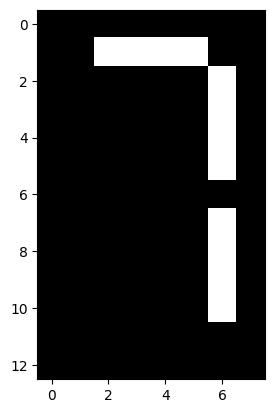

In [20]:
plt.imshow(led0, cmap='gray')
plt.show()

In [21]:
led

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


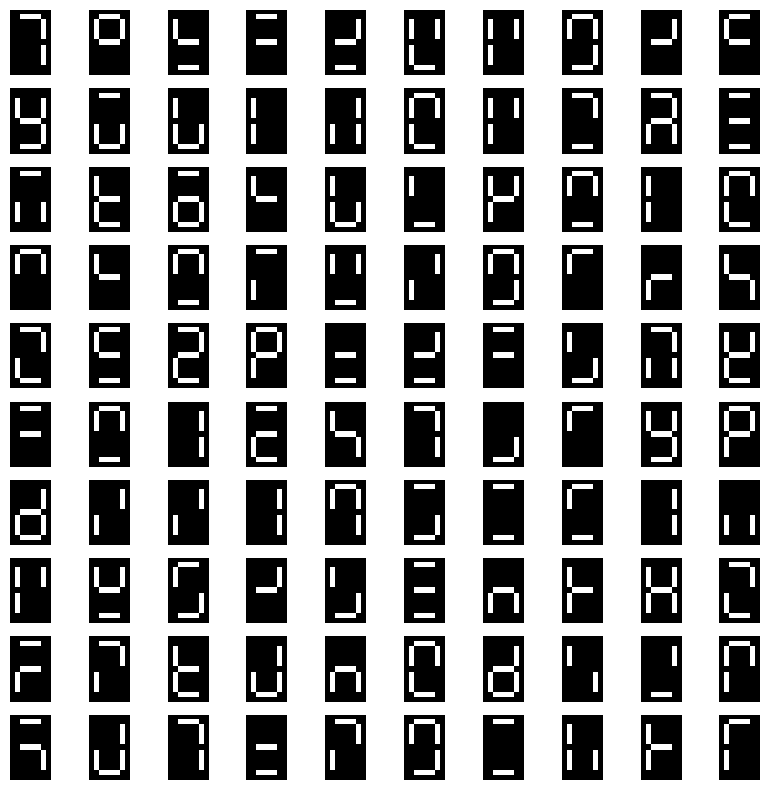

In [22]:
plt.figure(figsize=(10, 10))
for index, image_data in led.iterrows():
    image = image_data.values.reshape((13, 8))
    plt.subplot(10, 10, index + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

### NMF learns topics of documents

In [23]:
# from wikipedia example above
model.components_.shape, model.components_

((6, 13125),
 array([[1.15074043e-02, 1.22369407e-03, 0.00000000e+00, ...,
         0.00000000e+00, 4.28298710e-04, 0.00000000e+00],
        [0.00000000e+00, 9.60835403e-06, 5.69508495e-03, ...,
         2.82862489e-03, 2.99008169e-04, 0.00000000e+00],
        [0.00000000e+00, 8.34892636e-06, 0.00000000e+00, ...,
         0.00000000e+00, 1.43955241e-04, 0.00000000e+00],
        [4.17574021e-03, 0.00000000e+00, 3.07682021e-03, ...,
         1.75381368e-03, 6.76561390e-03, 0.00000000e+00],
        [0.00000000e+00, 5.71037190e-04, 4.94087197e-03, ...,
         1.92537341e-04, 1.35780670e-03, 0.00000000e+00],
        [1.38910944e-04, 0.00000000e+00, 8.78565757e-03, ...,
         2.41099156e-03, 1.68943461e-03, 0.00000000e+00]]))

In [24]:
components_df = pd.DataFrame(model.components_, columns=words)
components_df

,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
0,0.011507,0.001224,0.000000,0.001759,0.000138,0.0,0.0,0.002492,3.008082e-07,0.000844,...,0.026080,0.0,0.00842,0.000000,0.0,0.0,0.0,0.000000,0.000428,0.0
1,0.000000,0.000010,0.005695,0.000000,0.000002,0.0,0.0,0.000569,5.030857e-04,0.000000,...,0.008152,0.0,0.00000,0.001719,0.0,0.0,0.0,0.002829,0.000299,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004715,0.0,0.0,0.000762,1.613318e-05,0.000000,...,0.008774,0.0,0.00000,0.001324,0.0,0.0,0.0,0.000000,0.000144,0.0
3,0.004176,0.000000,0.003077,0.000000,0.000618,0.0,0.0,0.002453,8.193629e-05,0.004012,...,0.012678,0.0,0.00000,0.000000,0.0,0.0,0.0,0.001754,0.006766,0.0
4,0.000000,0.000571,0.004941,0.000000,0.000000,0.0,0.0,0.000089,4.278669e-05,0.000000,...,0.001818,0.0,0.00000,0.000017,0.0,0.0,0.0,0.000193,0.001358,0.0
5,0.000139,0.000000,0.008786,0.000000,0.000185,0.0,0.0,0.008666,1.536448e-05,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.002411,0.001689,0.0


In [25]:
component = components_df.iloc[3]
component

,3
aaron,0.004176
abandon,0.000000
abandoned,0.003077
abandoning,0.000000
abandonment,0.000618
...,...
zimbabwe,0.000000
zinc,0.000000
zone,0.001754
zones,0.006766


In [26]:
component.nlargest()

,3
film,0.632174
award,0.254862
starred,0.246963
role,0.212898
actress,0.187673


### NMF learns the parts of images

In [27]:
led.shape

(100, 104)

In [28]:
samples = led.values
samples.shape

(100, 104)

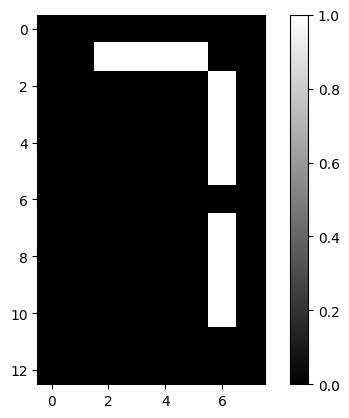

In [29]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

show_as_image(samples[0])

In [30]:
model = NMF(n_components=7)
model

NMF(n_components=7)

In [31]:
features = model.fit_transform(led) # also works with datafame
features.shape

(100, 7)

In [32]:
model.components_.shape

(7, 104)

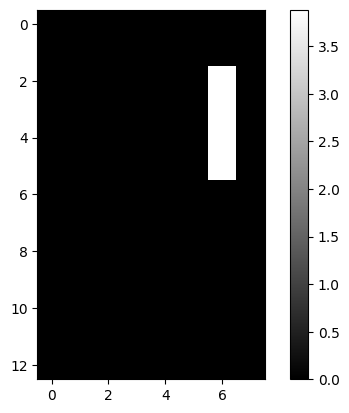

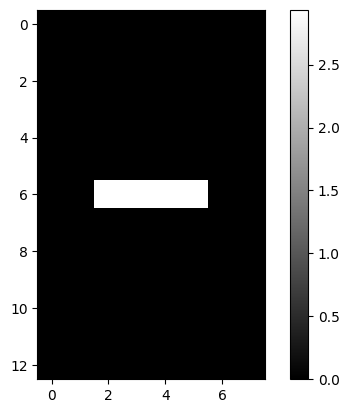

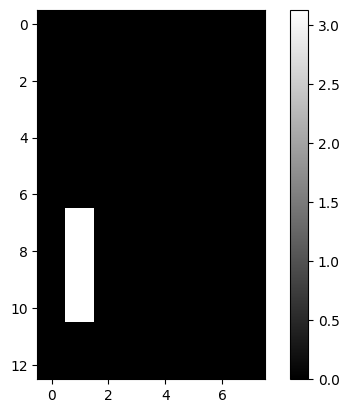

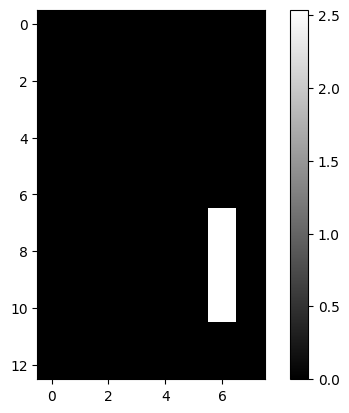

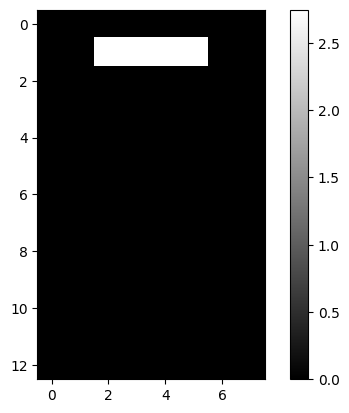

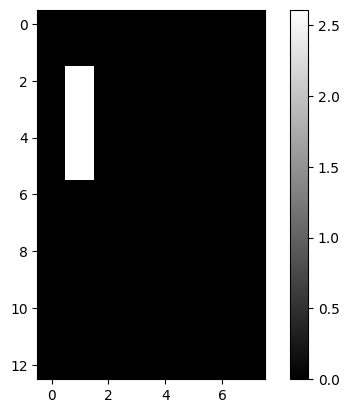

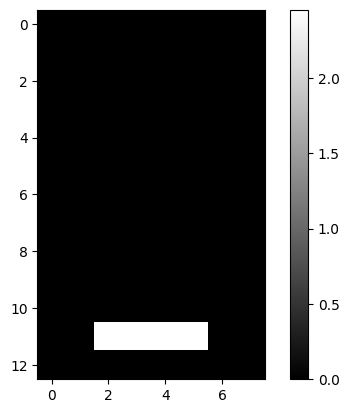

In [33]:
for component in model.components_:
    show_as_image(component)

In [34]:
features.shape

(100, 7)

In [35]:
digit_features = features[0]
digit_features

array([2.57347960e-01, 0.00000000e+00, 0.00000000e+00, 3.94333376e-01,
       3.64045642e-01, 0.00000000e+00, 3.51281843e-14])

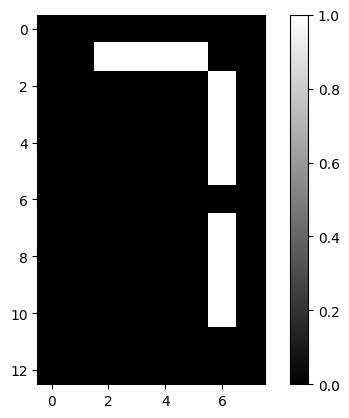

In [36]:
reconstructed_image = (digit_features.reshape((1, 7)) @ model.components_).round()[0].reshape((13, 8))
show_as_image(reconstructed_image)

### PCA doesn't learn parts

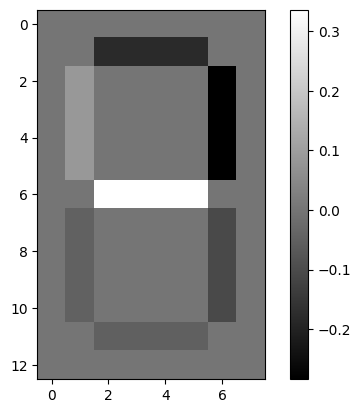

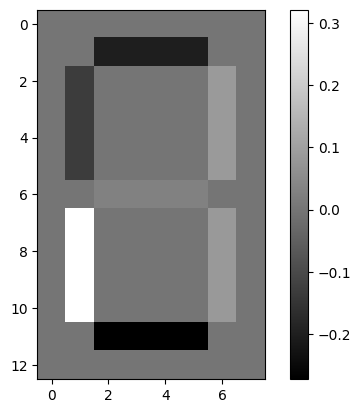

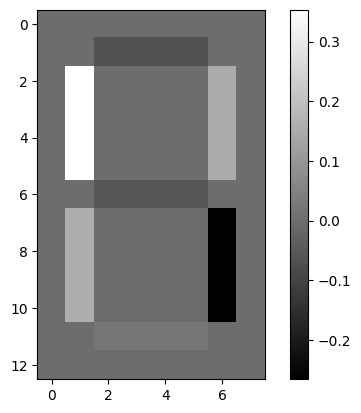

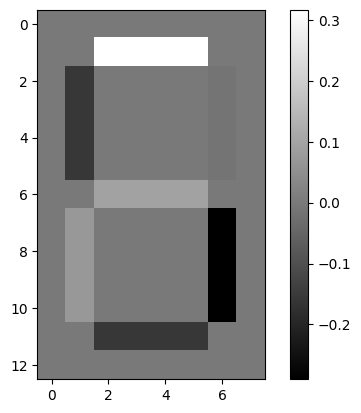

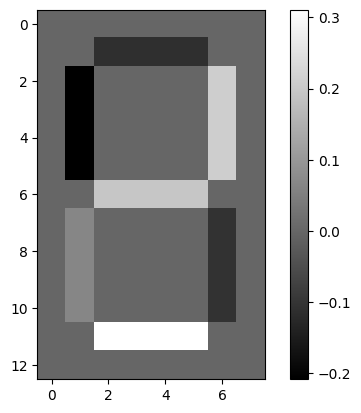

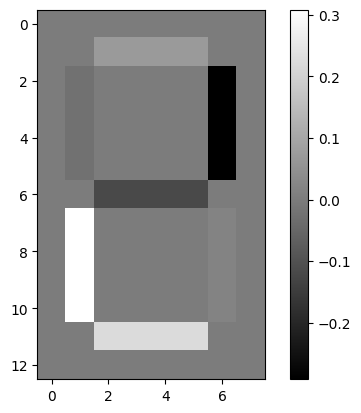

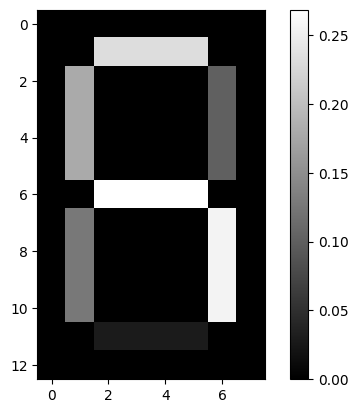

In [37]:
model = PCA(n_components=7)

features = model.fit_transform(led)

for component in model.components_:
    show_as_image(component)

## PCA Review

### PCA concept

- We already saw that you can describe the information captured by two features by using two perpendicular vectors that are aligned with the variance in the data

<img src='https://drive.google.com/uc?export=view&id=1VKFf7ABKMBeuw_xhEL4lH3uw763_NQZK'/>

- For instance, the point highlighted here has coordinates $(2.7, 1)$ in the original hand length vers foot length reference system

<img src='https://drive.google.com/uc?export=view&id=16C9BH_pXvBAcfP3CFVTf4v0vWo5rzZYG'/>

- But we could just as well describe this point using multiplications of the vectors. In this case it would be 2 times the red vector minus 1 times the yellow vector

<img src='https://drive.google.com/uc?export=view&id=1ex7bEMZpJ0PlAtMtff5cphwkdePePxlz'/>


- We call these vectors the **first (red) and second (yellow) principal components**, where the first component is most important as it is aligned with the biggest source of variance in the data

  

### Calculating the principal components

- We can calculate these principal components for all points in the dataset with sklearn's `PCA()` class
- First we have to scale the values

```python
from sklearn.preprocessing import StandardScaler

# PCA can really under perform without scaling first
scaler = StandardScaler
std_df = scaler.fit_transform(df)

pca = PCA()
print(pca.fit_transform(std_df))
```

### PCA removes correlation

<img src='https://drive.google.com/uc?export=view&id=1aGBodYDDPfSRRqabBo-71uoadr04fFWk'/>

### Principal component explained variance ratio

- Since the components are no correlated, they share no duplicate information
- They are ranked from most to least important

```python
pca.explained_variance_ratio
```

```bash
array([0.90, 0.10])
```

- This tells us that the first component explains 90% of the variance in the data and the second component explains the remaining 10%.
- When you are dealing with a dataset with a lot of correlation, the explained variance typicall becomes concentrated in the first few components
    - The remaining components can be dropped

### PCA for dimensionality reduction

- Let's look at a data sample with very strong correlation

<img src='https://drive.google.com/uc?export=view&id=1qgJu1Tk66i72Wvj0HLQP3dLINMn2DYpO'/>

- The first component explains more than 99.9% of the variance in the data
    - `pca.explained_variance_ratio_` confirms this
    - Clearly makes sense to drop the second component
  

### PCA for higher dimensional example

```python
pca = PCA()

pca.fit(ansur_std_df)

print(pca.explained_variance_ratio_)
```

<img src='https://drive.google.com/uc?export=view&id=1hwa3yJD3hJW0BOAocH2jGGxgq0S61fsT'/>

- The full ANSURE dataset has 94 highly correlated features
- When we fit PCA to this data, we find that the first 2 components explain 44% and 18% of the variance in the data

```python
pca.explained_variance_ratio_.cumsum()
```

- We find we can keep 80% with just 10 components

  

In [38]:
ansur_4 = np.array([[   1.776,  882.   ,  933.   , 1151.   ],
       [   1.702,  870.   ,  870.   , 1119.   ],
       [   1.735,  901.   ,  964.   , 1276.   ],
       [   1.655,  821.   ,  857.   , 1155.   ],
       [   1.914, 1080.   ,  868.   , 1231.   ],
       [   1.72 ,  871.   ,  950.   , 1172.   ],
       [   1.81 ,  919.   , 1073.   , 1331.   ],
       [   1.85 ,  950.   , 1010.   , 1188.   ],
       [   1.777,  926.   , 1065.   , 1212.   ],
       [   1.811,  944.   ,  824.   , 1094.   ],
       [   1.78 ,  879.   ,  994.   , 1203.   ],
       [   1.733,  937.   ,  866.   , 1126.   ],
       [   1.814,  989.   ,  986.   , 1275.   ],
       [   1.861,  976.   , 1045.   , 1354.   ],
       [   1.709,  856.   , 1007.   , 1149.   ],
       [   1.74 ,  946.   , 1033.   , 1224.   ],
       [   1.694,  852.   ,  908.   , 1145.   ],
       [   1.766,  910.   , 1028.   , 1152.   ],
       [   1.748,  904.   ,  874.   , 1140.   ],
       [   1.794,  898.   ,  999.   , 1146.   ],
       [   1.78 ,  895.   ,  837.   , 1125.   ],
       [   1.68 ,  820.   ,  880.   , 1121.   ],
       [   1.653,  877.   ,  978.   , 1170.   ],
       [   1.959, 1057.   ,  827.   , 1203.   ],
       [   1.755,  893.   , 1030.   , 1160.   ],
       [   1.63 ,  825.   ,  885.   , 1031.   ],
       [   1.825,  951.   , 1130.   , 1238.   ],
       [   1.795,  896.   ,  912.   , 1095.   ],
       [   1.745,  900.   ,  864.   , 1084.   ],
       [   1.818,  901.   ,  965.   , 1135.   ],
       [   1.881,  944.   ,  777.   , 1141.   ],
       [   1.76 ,  903.   , 1063.   , 1141.   ],
       [   1.675,  850.   ,  870.   , 1040.   ],
       [   1.852,  989.   ,  966.   , 1182.   ],
       [   1.785,  898.   ,  806.   , 1123.   ],
       [   1.791,  920.   , 1096.   , 1154.   ],
       [   1.685,  862.   ,  895.   , 1013.   ],
       [   1.85 ,  963.   , 1214.   , 1253.   ],
       [   1.737,  897.   ,  790.   , 1147.   ],
       [   1.743,  860.   , 1002.   , 1209.   ],
       [   1.744,  900.   ,  748.   , 1012.   ],
       [   1.679,  874.   , 1043.   , 1233.   ],
       [   1.836,  912.   ,  864.   , 1150.   ],
       [   1.73 ,  893.   ,  969.   , 1244.   ],
       [   1.762,  899.   , 1095.   , 1167.   ],
       [   1.669,  805.   ,  770.   , 1086.   ],
       [   1.74 ,  844.   ,  840.   , 1100.   ],
       [   1.709,  908.   , 1028.   , 1190.   ],
       [   1.879,  970.   , 1021.   , 1195.   ],
       [   1.674,  831.   , 1061.   , 1123.   ],
       [   1.779,  911.   , 1139.   , 1254.   ],
       [   1.844,  939.   ,  922.   , 1164.   ],
       [   1.637,  847.   ,  995.   , 1073.   ],
       [   1.754,  907.   , 1047.   , 1187.   ],
       [   1.704,  842.   ,  885.   , 1155.   ],
       [   1.84 ,  971.   , 1379.   , 1309.   ],
       [   1.783,  973.   ,  750.   , 1093.   ],
       [   1.748,  882.   ,  970.   , 1184.   ],
       [   1.703,  898.   , 1068.   , 1252.   ],
       [   1.852,  936.   , 1012.   , 1234.   ],
       [   1.609,  841.   ,  754.   , 1035.   ],
       [   1.709,  909.   ,  926.   , 1130.   ],
       [   1.835,  950.   ,  827.   , 1065.   ],
       [   1.679,  883.   ,  940.   , 1141.   ],
       [   1.742,  912.   , 1133.   , 1161.   ],
       [   1.698,  885.   ,  843.   , 1037.   ],
       [   1.671,  840.   , 1021.   , 1112.   ],
       [   1.85 ,  969.   , 1061.   , 1258.   ],
       [   1.754,  884.   ,  786.   , 1117.   ],
       [   1.619,  842.   ,  855.   , 1143.   ],
       [   1.772,  917.   ,  830.   , 1116.   ],
       [   1.705,  922.   ,  743.   , 1067.   ],
       [   1.619,  815.   ,  967.   , 1143.   ],
       [   1.726,  870.   ,  922.   , 1156.   ],
       [   1.84 ,  963.   , 1120.   , 1192.   ],
       [   1.743,  894.   , 1060.   , 1217.   ],
       [   1.674,  845.   , 1030.   , 1201.   ],
       [   1.75 ,  938.   ,  974.   , 1264.   ],
       [   1.819,  935.   ,  844.   , 1271.   ],
       [   1.799,  957.   ,  969.   , 1189.   ],
       [   1.75 ,  932.   , 1010.   , 1173.   ],
       [   1.723,  914.   ,  892.   , 1140.   ],
       [   1.809,  948.   , 1032.   , 1142.   ],
       [   1.791,  888.   ,  851.   , 1142.   ],
       [   1.723,  879.   ,  979.   , 1193.   ],
       [   1.578,  746.   ,  857.   , 1013.   ],
       [   1.718,  882.   ,  979.   , 1116.   ],
       [   1.799,  898.   ,  984.   , 1151.   ],
       [   1.74 ,  939.   ,  721.   , 1095.   ],
       [   1.702,  870.   ,  885.   , 1137.   ],
       [   1.737,  898.   ,  961.   , 1187.   ],
       [   1.73 ,  874.   ,  996.   , 1142.   ],
       [   1.785,  901.   ,  838.   , 1064.   ],
       [   1.817,  960.   ,  752.   , 1096.   ],
       [   1.843,  955.   ,  775.   , 1128.   ],
       [   1.791,  950.   ,  809.   , 1179.   ],
       [   1.657,  845.   ,  862.   , 1128.   ],
       [   1.701,  895.   , 1027.   , 1124.   ],
       [   1.786,  880.   ,  797.   , 1148.   ],
       [   1.755,  894.   , 1082.   , 1197.   ],
       [   1.791,  920.   ,  942.   , 1157.   ],
       [   1.759,  890.   ,  871.   , 1127.   ],
       [   1.79 ,  914.   ,  912.   , 1195.   ],
       [   1.782,  896.   ,  873.   , 1123.   ],
       [   1.839,  950.   ,  785.   ,  961.   ],
       [   1.88 ,  977.   , 1023.   , 1154.   ],
       [   1.738,  897.   ,  924.   , 1222.   ],
       [   1.734,  886.   , 1001.   , 1194.   ],
       [   1.819,  998.   ,  901.   , 1220.   ],
       [   1.683,  884.   ,  958.   , 1162.   ],
       [   1.815,  953.   ,  972.   , 1156.   ],
       [   1.815,  906.   ,  939.   , 1154.   ],
       [   1.673,  845.   , 1003.   , 1197.   ],
       [   1.831,  931.   , 1139.   , 1243.   ],
       [   1.795,  959.   , 1162.   , 1161.   ],
       [   1.845,  960.   , 1111.   , 1228.   ],
       [   1.687,  836.   ,  900.   , 1127.   ],
       [   1.756,  918.   ,  998.   , 1117.   ],
       [   1.846, 1011.   , 1330.   , 1368.   ],
       [   1.657,  836.   ,  897.   , 1219.   ],
       [   1.632,  841.   ,  911.   , 1105.   ],
       [   1.735,  895.   ,  861.   , 1186.   ],
       [   1.726,  889.   ,  920.   , 1064.   ],
       [   1.877,  962.   , 1192.   , 1258.   ],
       [   1.887,  959.   , 1012.   , 1183.   ],
       [   1.765,  987.   ,  845.   , 1060.   ],
       [   1.793,  988.   ,  843.   , 1201.   ],
       [   1.849,  930.   ,  910.   , 1268.   ],
       [   1.811,  945.   ,  879.   , 1151.   ],
       [   1.739,  891.   , 1031.   , 1210.   ],
       [   1.668,  872.   ,  929.   , 1085.   ],
       [   1.788,  926.   ,  994.   , 1144.   ],
       [   1.746,  962.   ,  815.   , 1182.   ],
       [   1.75 ,  933.   ,  983.   , 1165.   ],
       [   1.81 ,  923.   , 1004.   , 1242.   ],
       [   1.71 ,  853.   ,  825.   , 1115.   ],
       [   1.847,  971.   , 1077.   , 1223.   ],
       [   1.811,  929.   ,  952.   , 1162.   ],
       [   1.78 ,  956.   , 1047.   , 1286.   ],
       [   1.74 ,  898.   ,  851.   , 1170.   ],
       [   1.797,  919.   ,  920.   , 1224.   ],
       [   1.755,  927.   ,  934.   , 1241.   ],
       [   1.842,  972.   , 1114.   , 1248.   ],
       [   1.656,  869.   ,  967.   , 1157.   ],
       [   1.776,  908.   , 1007.   , 1183.   ],
       [   1.859,  989.   , 1109.   , 1199.   ],
       [   1.685,  850.   ,  827.   , 1154.   ],
       [   1.775,  918.   ,  947.   , 1176.   ],
       [   1.825, 1014.   ,  881.   , 1162.   ],
       [   1.931, 1015.   ,  833.   , 1168.   ],
       [   1.789,  944.   ,  963.   , 1235.   ],
       [   1.819,  953.   , 1100.   , 1295.   ],
       [   1.782,  919.   ,  852.   , 1216.   ],
       [   1.721,  880.   ,  941.   , 1200.   ],
       [   1.91 , 1004.   , 1026.   , 1314.   ],
       [   1.804,  945.   ,  978.   , 1181.   ],
       [   1.782,  950.   , 1150.   , 1235.   ],
       [   1.777,  931.   ,  935.   , 1245.   ],
       [   1.665,  830.   ,  923.   , 1096.   ],
       [   1.803,  950.   ,  973.   , 1183.   ],
       [   1.879, 1008.   ,  908.   , 1272.   ],
       [   1.733,  899.   , 1111.   , 1226.   ],
       [   1.835,  978.   , 1031.   , 1204.   ],
       [   1.792,  939.   , 1164.   , 1248.   ],
       [   1.721,  870.   , 1006.   , 1149.   ],
       [   1.711,  888.   , 1018.   , 1175.   ],
       [   1.809,  945.   ,  992.   , 1216.   ],
       [   1.664,  869.   ,  908.   , 1168.   ],
       [   1.807,  933.   , 1053.   , 1212.   ],
       [   1.705,  887.   ,  912.   , 1128.   ],
       [   1.955, 1021.   , 1049.   , 1291.   ],
       [   1.73 ,  875.   ,  917.   , 1190.   ],
       [   1.774,  927.   , 1066.   , 1184.   ],
       [   1.724,  912.   ,  848.   , 1080.   ],
       [   1.705,  888.   ,  759.   , 1097.   ],
       [   1.838,  950.   ,  959.   , 1151.   ],
       [   1.706,  892.   ,  970.   , 1203.   ],
       [   1.809,  960.   , 1068.   , 1225.   ],
       [   1.773,  933.   ,  972.   , 1134.   ],
       [   1.734,  886.   ,  993.   , 1109.   ],
       [   1.748,  898.   ,  898.   , 1134.   ],
       [   1.651,  832.   ,  964.   , 1186.   ],
       [   1.724,  885.   ,  881.   , 1107.   ],
       [   1.86 ,  954.   ,  821.   , 1122.   ],
       [   1.715,  875.   ,  801.   , 1085.   ],
       [   1.757,  919.   ,  845.   , 1126.   ],
       [   1.916,  979.   , 1134.   , 1252.   ],
       [   1.847,  992.   ,  877.   , 1173.   ],
       [   1.855,  990.   ,  951.   , 1270.   ],
       [   1.718,  880.   ,  867.   , 1083.   ],
       [   1.641,  806.   , 1029.   , 1178.   ],
       [   1.833,  945.   ,  879.   , 1171.   ],
       [   1.784,  939.   , 1015.   , 1254.   ],
       [   1.77 ,  892.   , 1034.   , 1256.   ],
       [   1.702,  877.   ,  844.   , 1107.   ],
       [   1.8  ,  933.   ,  797.   , 1151.   ],
       [   1.715,  918.   ,  892.   , 1081.   ],
       [   1.842,  944.   ,  865.   , 1153.   ],
       [   1.71 ,  880.   , 1031.   , 1158.   ],
       [   1.753,  951.   ,  912.   , 1215.   ],
       [   1.935, 1015.   , 1086.   , 1243.   ],
       [   1.738,  909.   ,  914.   , 1105.   ],
       [   1.77 ,  926.   ,  923.   , 1189.   ],
       [   1.72 ,  917.   ,  918.   , 1193.   ],
       [   1.673,  831.   ,  831.   , 1082.   ],
       [   1.715,  883.   , 1182.   , 1293.   ],
       [   1.822,  947.   , 1054.   , 1155.   ],
       [   1.913,  981.   , 1118.   , 1243.   ],
       [   1.756,  919.   ,  963.   , 1187.   ],
       [   1.735,  881.   ,  877.   , 1205.   ],
       [   1.726,  908.   ,  912.   , 1230.   ],
       [   1.716,  871.   ,  973.   , 1242.   ],
       [   1.717,  879.   ,  818.   , 1029.   ],
       [   1.718,  915.   ,  783.   , 1103.   ],
       [   1.747,  923.   , 1015.   , 1260.   ],
       [   1.567,  861.   ,  694.   ,  995.   ],
       [   1.894,  972.   , 1121.   , 1217.   ],
       [   1.738,  927.   ,  870.   , 1151.   ],
       [   1.862, 1002.   , 1015.   , 1218.   ],
       [   1.654,  858.   ,  738.   , 1012.   ],
       [   1.637,  845.   , 1032.   , 1153.   ],
       [   1.738,  884.   ,  979.   , 1231.   ],
       [   1.813, 1024.   , 1017.   , 1261.   ],
       [   1.738,  970.   ,  883.   , 1163.   ],
       [   1.815,  980.   , 1068.   , 1288.   ],
       [   1.736,  860.   , 1179.   , 1183.   ],
       [   1.689,  866.   ,  993.   , 1174.   ],
       [   1.74 ,  913.   ,  880.   , 1065.   ],
       [   1.782,  942.   ,  977.   , 1104.   ],
       [   1.784,  961.   ,  925.   , 1133.   ],
       [   1.647,  861.   , 1010.   , 1167.   ],
       [   1.74 ,  888.   , 1004.   , 1197.   ],
       [   1.664,  857.   ,  744.   , 1083.   ],
       [   1.805,  945.   , 1045.   , 1235.   ],
       [   1.745,  932.   ,  936.   , 1206.   ],
       [   1.605,  843.   ,  755.   , 1139.   ],
       [   1.83 ,  976.   ,  997.   , 1215.   ],
       [   1.81 ,  967.   ,  913.   , 1171.   ],
       [   1.731,  886.   ,  921.   , 1118.   ],
       [   1.845,  964.   ,  899.   , 1122.   ],
       [   1.775,  965.   ,  734.   , 1112.   ],
       [   1.795,  926.   , 1124.   , 1253.   ],
       [   1.664,  891.   ,  976.   , 1170.   ],
       [   1.752,  906.   , 1084.   , 1176.   ],
       [   1.814,  963.   , 1026.   , 1143.   ],
       [   1.836,  981.   , 1078.   , 1265.   ],
       [   1.628,  849.   ,  972.   , 1107.   ],
       [   1.64 ,  835.   ,  903.   , 1214.   ],
       [   1.728,  850.   ,  928.   , 1209.   ],
       [   1.606,  821.   ,  779.   , 1025.   ]])

In [39]:
ansur_df = pd.DataFrame(ansur_4,
                        columns=['Height m',
                                 'Buttock Height',
                                 'Waist Circumference',
                                 'Shoulder Circumference'])

ansur_df = ansur_df.astype({
    'Height m': 'float64',
    'Buttock Height': 'int64',
    'Waist Circumference': 'int64',
    'Shoulder Circumference': 'int64'
})

ansur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Height m                250 non-null    float64
 1   Buttock Height          250 non-null    int64  
 2   Waist Circumference     250 non-null    int64  
 3   Shoulder Circumference  250 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 7.9 KB


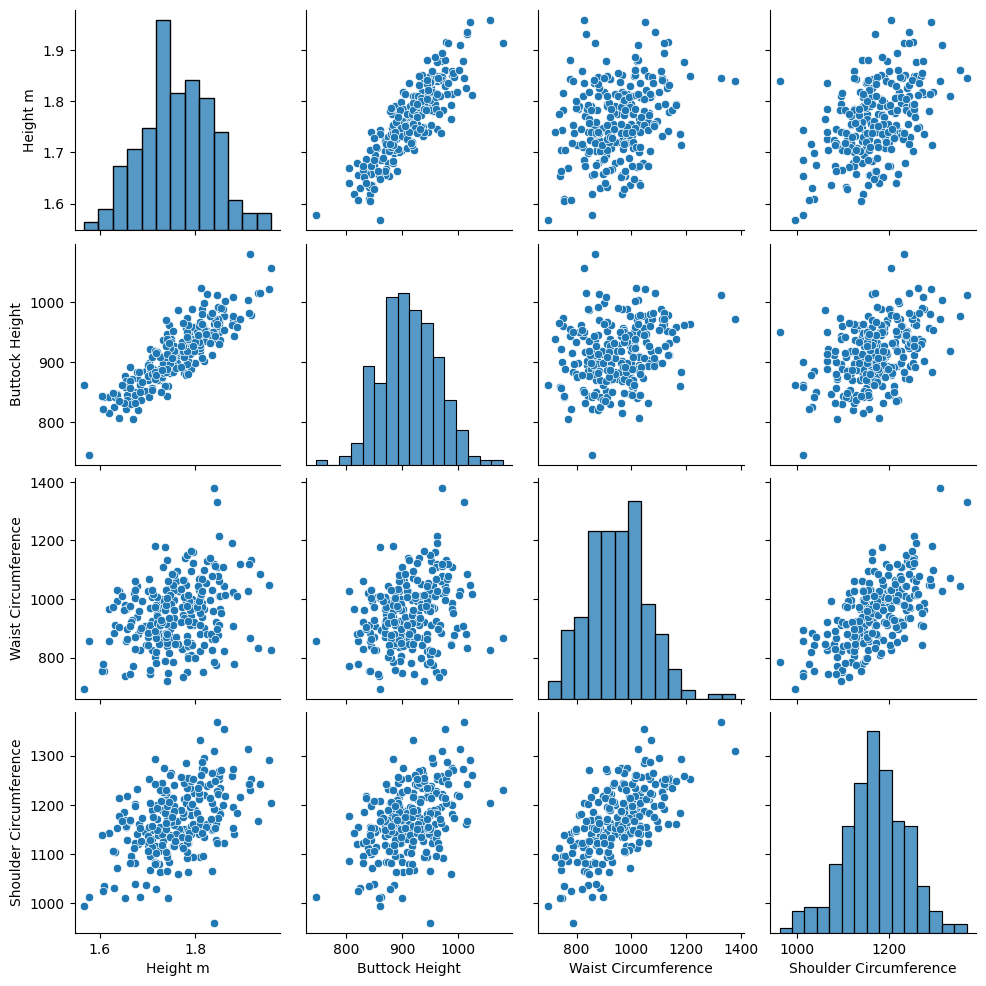

In [40]:
sns.pairplot(ansur_df)

plt.show()

In [41]:
# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

pc_df = pd.DataFrame(pc, columns=['PC 1',
                                  'PC 2',
                                  'PC 3',
                                  'PC 4'])

pc_df

,PC 1,PC 2,PC 3,PC 4
0,-0.409961,-0.015279,-0.101298,-0.586143
1,-1.567830,-0.043638,0.091905,-0.056078
2,0.534760,0.998495,1.212991,0.012071
3,-2.218024,0.830341,0.740261,-0.320304
4,3.087678,-2.558020,0.610794,0.735838
...,...,...,...,...
245,2.479782,0.275132,0.107641,0.241109
246,-2.063777,1.115232,-0.412211,0.456376
247,-1.570704,1.423037,1.167174,0.013531
248,-0.693217,0.888839,0.733916,-0.612426


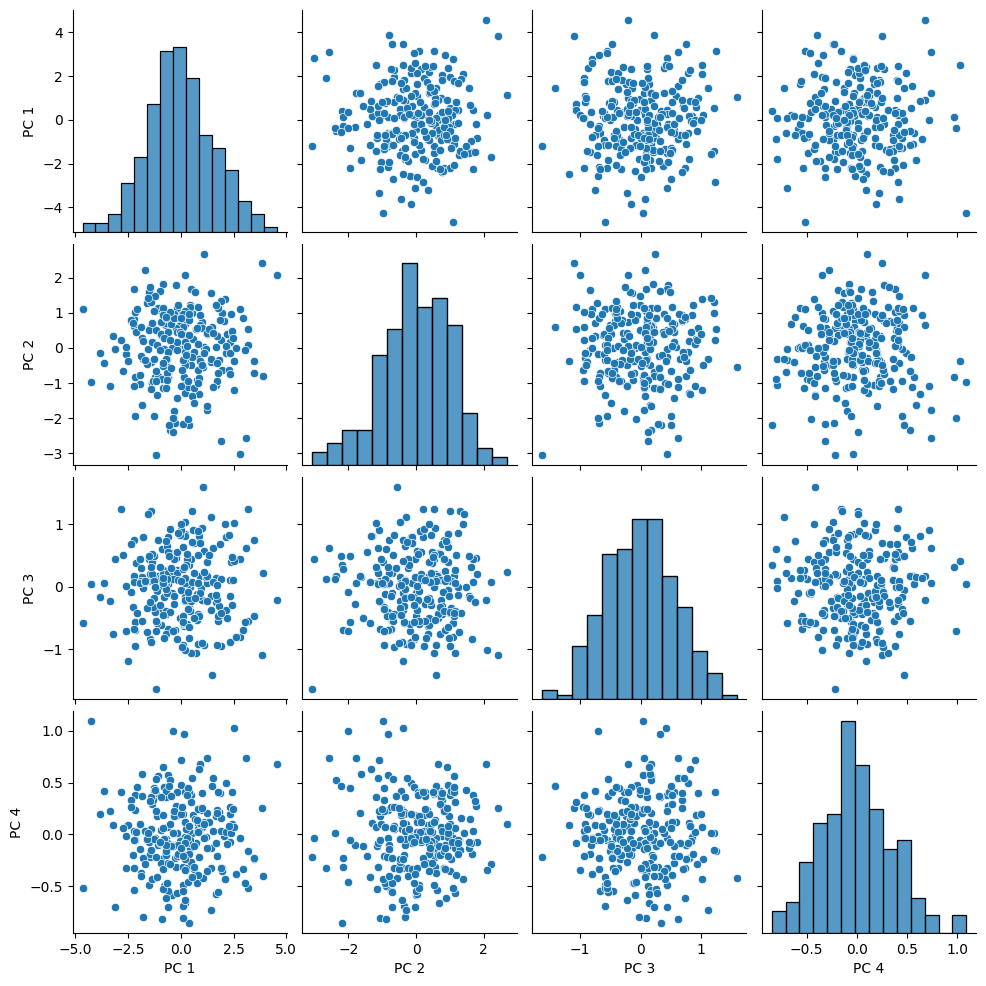

In [42]:
# decorrelated
sns.pairplot(pc_df)

plt.show()

## Building recommender systems using NMF

### Finding similar articles

- You are an engineer at a large online newspaper
- Task: recommend articles similar to article being read by customer
- Similar articles should have similar topics

### Strategy

- Apply NMF to the word-frequency array
- NMF feature values describe the topics
    - So similar documents have similar MMF feature values
- How to compare NMF feature values?

### Apply NMF to the word-frequency array

- `articles` is a word frequency array

```python
from sklearn.decomposition import NMF

nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)
```

### Versions of articles

- Different versions of the same document have same topic proportions
    - exact feature values may be different
    - one version may use many meaningless words

<img src='https://drive.google.com/uc?export=view&id=1Wp9pzpwkpoS6UnuGERz4gqk9owR7Mexo'/>

- meaningless chatter reduces the frequency of the topic words overall, which reduces the values of the NMF features representing topics
- However, on a scatter plot of the NMF features, all these versions lie on a single line passing through the origin

<img src='https://drive.google.com/uc?export=view&id=1dDRFV-7PZiBXhp2eM5NI0ELql0hNCy6B'/>




### Cosine similarity

- Use the angle between the lines
- Higher values mean greater similarity between documents
- Maximum value is 1, when angle is 0 degrees

### Calculating the cosine similarities

```python
from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)

# if has index 23
current_article = norm_features[23, :]
similarities = norm_features.dot(current_article)

# this results in the cosine similarity
```

### DataFrames andm labels

- label similarities with the article titles, using a DataFrame
- Titles given as a list: `titles`

```python
import pandas as pd

norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
current_article = df.loc['Dog bites man'] # using its title

#calculate the cosine similarity
similarities = df.dot(current_article)
similarities.nlargest()
```

### Which articles are similar to "Cristiano Ronaldo"?

In [43]:
nmf_features.shape # these were cacluated earlier

(60, 6)

In [44]:
norm_features = normalize(nmf_features)
norm_features.shape

(60, 6)

In [45]:
df = pd.DataFrame(norm_features, index=titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,1.000000
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,1.000000
Internet Explorer,0.009515,0.0,0.0,0.0,0.0,0.999955
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,1.000000
Google Search,0.000000,0.0,0.0,0.0,0.0,1.000000


In [46]:
article = df.loc['Cristiano Ronaldo']
article

,Cristiano Ronaldo
0,0.002507
1,0.999942
2,0.000859
3,0.010258
4,0.001949
5,0.000722


In [47]:
similarities = df.dot(article)
similarities.nlargest()

,0
Cristiano Ronaldo,1.000000
Franck Ribéry,0.999973
Radamel Falcao,0.999942
Zlatan Ibrahimović,0.999942
France national football team,0.999923


### Recommend musical artists part 1

```python
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)
```

### Recommed musical artists part 2

```python
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
```